1. Para simular un conjunto de características $x_1$ , $x_2$,..., $x_n$ trabajaremos en la primera parte con dos características de datos aleatorios que presentan un plano y mostraremos que los párametros optimizados se corresponden con el valor esperado.

- Definir la ecuación  $y = 2.1*x_1 - 3.1*x_2$, y generar números aleatorios que pertenecen al plano.

- Realizar un diagrama 3D de los puntos generados aleatoriamente.


Nuestro objetivo será encontrar los valores $\theta_0 = 0, \theta_1=2.1, \theta_1=3.1$ que mejor ajustar el plano, empleando cálculos vectorizados.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [5]:
np.random.seed(123)
n=100
x1=np.random.rand(n,1)
x2=np.random.rand(n,1)
y=2.1*x1-3.1*x2



Ahora generamos valores para el plano

In [6]:
coso1 =5
coefx1 = 2.1
coefx2 = -3.1

y = coso1 + coefx1 * x1 + coefx2 * x2


df = pd.DataFrame({
    'x1': x1.flatten(),
    'x2': x2.flatten(),
    'y': y.flatten()
})

print(df.head())

         x1        x2         y
0  0.696469  0.513128  4.871888
1  0.286139  0.666625  3.534356
2  0.226851  0.105908  5.148072
3  0.551315  0.130895  5.751987
4  0.719469  0.321981  5.512745


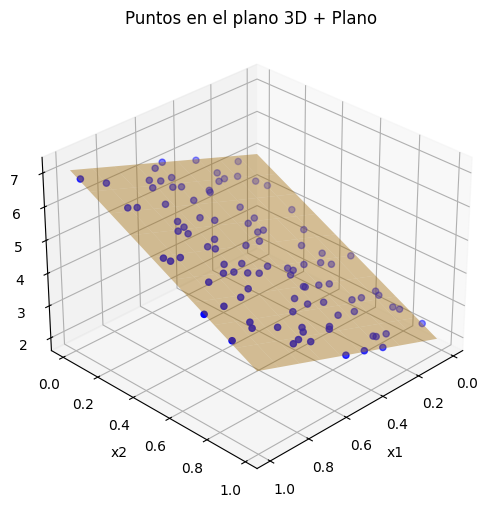

In [7]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['x1'], df['x2'], df['y'], c='blue', marker='o', label='Puntos')

x1_range = np.linspace(df['x1'].min(), df['x1'].max(), 10)
x2_range = np.linspace(df['x2'].min(), df['x2'].max(), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

y_grid = coso1 + coefx1 * x1_grid + coefx2 * x2_grid

ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.4, color='orange', label='Plano')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(elev=30, azim=45)
ax.set_title('Puntos en el plano 3D + Plano')

plt.show()

2. Inicializar conjunto de parámetros $\Theta$ de manera aleatoria.

In [8]:
theta= np.random.rand(3,1)
print(theta)

[[0.54263593]
 [0.06677444]
 [0.65336487]]


3. Construir la matrix X con dimensiones $(n+1, m)$, m es el numero de datos de entrenamiento y (n) el número de caracteristicas.

In [9]:
X_T= np.c_[np.ones((n, 1)), x1, x2]
X = X_T.T
print(X.shape)
print(X[:3])

(3, 100)
[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.     

4. Calcular la función de coste(revise cuidosamente las dimensiones de cada matriz):

  - $h = \Theta^{T} X $
  - $\Lambda= (h -Y) $
  - $\Lambda*= (h -Y)^2 $
  - $\Lambda= [\Lambda_1,\Lambda_2, ...,\Lambda_m]$
  - $J = \frac{1}{2m} \sum_{i}^m \Lambda_i $

Se hacen los cálculos matriciales de forma simple

In [10]:
h=np.dot(theta.T, X)
A= (h-y)
A1= np.dot(A, A.T)
J= np.sum(A1)/(2*n)
print(J)

64289.56516191774



5. Aplicar el gradiente descendente:
  - Encontrar el gradiente.
    $\nabla J = \Lambda X.T$
  
  - Actualizar los nuevos parametros:
    $\Theta_{n+1}=\Theta_{n}-\alpha\nabla J$

In [13]:
X = X_T
h = np.dot(X, theta)
grad = (1/n) * np.dot(X.T, (h - y))
tasa = 0.1
theta_nueva = theta - tasa * grad


6. Iterar para encontrar los valores $\Theta$ que se ajustan el plano.

Se itera sobre los valores de theta para producir valores numéricos de la ecuación anterior

In [14]:
ni = 100

for i in range(ni):
    h = np.dot(X, theta)
    grad = (1/n) * np.dot(X.T, (h - y))
    theta = theta - tasa * grad

    if i % 10 == 0:
        costo = (1/(2*n)) * np.sum((h - y)**2)
        print(f"Iter {i}, costo = {costo}")

Iter 0, costo = 7.156262710044215
Iter 10, costo = 1.128216972178143
Iter 20, costo = 0.7912350359430872
Iter 30, costo = 0.6770748906220293
Iter 40, costo = 0.5853046670777693
Iter 50, costo = 0.5066153851397897
Iter 60, costo = 0.43891632113620427
Iter 70, costo = 0.3806316593010785
Iter 80, costo = 0.33042085488888945
Iter 90, costo = 0.2871370155412673


7. Reescribir su código como una clase

Aquí trato de dejar todo lo más resumido posible, en forma de clases.

         x1        x2         y
0  0.696469  0.513128  4.871888
1  0.286139  0.666625  3.534356
2  0.226851  0.105908  5.148072
3  0.551315  0.130895  5.751987
4  0.719469  0.321981  5.512745


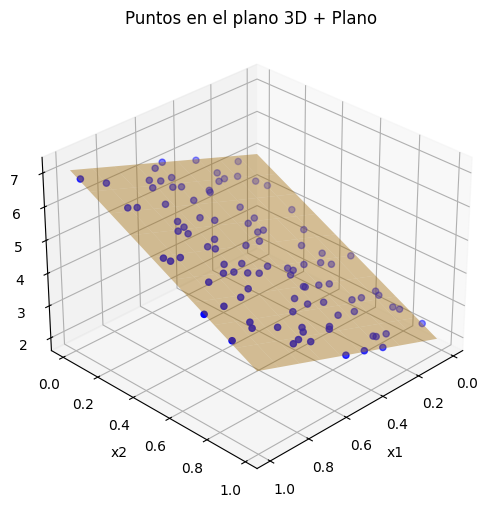

Iter 0, costo = 5.416882743296224
Iter 10, costo = 1.0525285553981143
Iter 20, costo = 0.7775885613792021
Iter 30, costo = 0.6672090472119305
Iter 40, costo = 0.5768897457106766
Iter 50, costo = 0.4993790712016452
Iter 60, costo = 0.4326879899137645
Iter 70, costo = 0.37526759489822104
Iter 80, costo = 0.3257981646682944
Iter 90, costo = 0.28315052520573536

Theta final:
[[ 3.67610274]
 [ 2.11884614]
 [-0.62546123]]


In [15]:
np.random.seed(123)
n = 100
x1 = np.random.rand(n, 1)
x2 = np.random.rand(n, 1)
coso1 = 5
coefx1 = 2.1
coefx2 = -3.1
y = coso1 + coefx1 * x1 + coefx2 * x2

df = pd.DataFrame({'x1': x1.flatten(), 'x2': x2.flatten(), 'y': y.flatten()})
print(df.head())

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x1'], df['x2'], df['y'], c='blue', marker='o')
x1_r = np.linspace(df['x1'].min(), df['x1'].max(), 10)
x2_r = np.linspace(df['x2'].min(), df['x2'].max(), 10)
x1_g, x2_g = np.meshgrid(x1_r, x2_r)
y_g = coso1 + coefx1 * x1_g + coefx2 * x2_g
ax.plot_surface(x1_g, x2_g, y_g, alpha=0.4, color='orange')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(elev=30, azim=45)
ax.set_title('Puntos en el plano 3D + Plano')
plt.show()

class Regresion:
    def __init__(self, x1, x2, y):
        self.n = len(y)
        self.X = np.c_[np.ones((self.n, 1)), x1, x2]
        self.y = y
        self.theta = np.random.rand(3, 1)
        self.tasa = 0.1
        self.hist_costos = []
        self.hist_thetas = []

    def modelo(self):
        return np.dot(self.X, self.theta)

    def costo(self):
        h = self.modelo()
        return (1/(2*self.n)) * np.sum((h - self.y)**2)

    def gradiente(self):
        h = self.modelo()
        return (1/self.n) * np.dot(self.X.T, (h - self.y))

    def paso(self):
        g = self.gradiente()
        self.theta = self.theta - self.tasa * g

    def ajustar(self, pasos=100):
        for i in range(pasos):
            self.paso()
            c = self.costo()
            self.hist_costos.append(c)
            self.hist_thetas.append(self.theta.copy())
            if i % 10 == 0:
                print(f"Iter {i}, costo = {c}")

reg = Regresion(x1, x2, y)
reg.ajustar(pasos=100)

print("\nTheta final:")
print(reg.theta)